In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [15]:
df = pd.read_csv('/Users/hwang-gyuhan/Desktop/Collage/3-2/딥러닝응용/4주차/DSA_features.csv')
df.drop(columns=['people'], inplace=True)
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,4.033226e-02,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,2.212497e-02,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,9.656444e-02,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,2.448990e-02,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall


In [16]:
df.shape

(9120, 271)

In [17]:
# 결측치 홗인

df.isnull().values.any()

False

In [18]:
LABELS = df[df['activity'].isin(['standing', 'jumping'])]

Text(0, 0.5, 'Frequency')

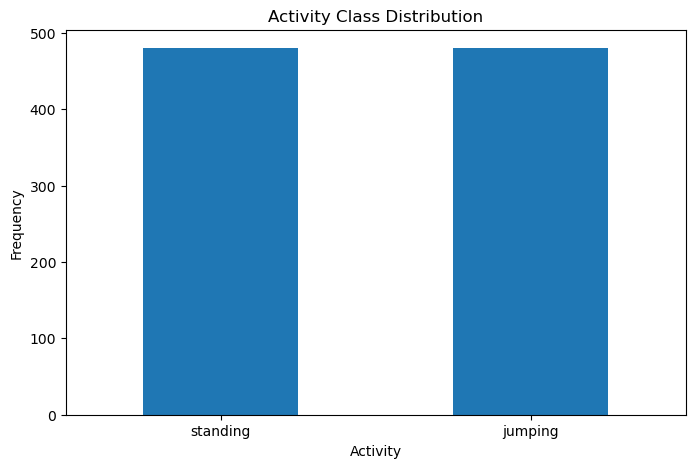

In [20]:
count_classes = pd.value_counts(LABELS['activity'], sort=True)
plt.figure(figsize=(8, 5))  
count_classes.plot(kind='bar', rot=0)
plt.title("Activity Class Distribution")
plt.xticks(rotation=0)
plt.xlabel("Activity")
plt.ylabel("Frequency")

In [21]:
standing = df[df.activity == "standing"]
jumping = df[df.activity == "jumping"]
standing.shape

(480, 271)

In [22]:
jumping.shape

(480, 271)

In [23]:
RANDOM_SEED = 42

### Denosing

In [25]:
# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임

In [29]:
No_noise_df = df[df['activity'] == 'sitting']

# 노이즈 추가할 열 리스트 (activity 열 제외)
feature_columns = df.columns.difference(['activity'])

noise_factor = 0.5

df.loc[df['activity'] == 'standing', feature_columns] += noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=df[df['activity'] == 'standing'][feature_columns].shape)

df.loc[df['activity'] == 'jumping', feature_columns] += noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=df[df['activity'] == 'jumping'][feature_columns].shape)

print(df[(df['activity'] == 'sitting') | (df['activity'] == 'jumping')])


df_total = pd.concat([df[df['activity'] == 'standing'], df[df['activity'] == 'jumping']])

X_train, X_test = train_test_split(df_total, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

X_train2, X_test2 = train_test_split(No_noise_df, test_size=0.1, random_state=42)
X_train2.shape, X_test2.shape


      T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  \
0        9.702000    8.156014    8.610696   -0.095998    0.222883   
1        7.786063    7.258746    8.471471    0.196910    0.037646   
2        7.703795    6.623029    7.761002    0.537818   -0.340636   
3        7.631541    8.875613    9.854559    1.554634   -0.687689   
4        6.876475    7.712497    8.106330   -1.709185    0.519589   
...           ...         ...         ...         ...         ...   
8635     9.743136   35.241345   -6.567012  133.967726   11.707402   
8636     8.776730   34.401944   -7.167281  145.308602   11.448979   
8637     8.436822   35.420099   -5.037915  131.717864   11.980921   
8638     8.430076   34.006136   -7.660769  135.668341   12.322712   
8639    10.136549   32.232232   -7.197233  129.141870   11.169168   

      T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  ...  \
0        1.428517     0.238371    0.429347   -0.259966   -0.441764  ...   
1        0.269534    

((432, 271), (48, 271))

Shape of X_train_numeric: (864, 270)
Shape of X_train2_numeric: (432, 270)
Training on X_train_numeric dataset
Epoch 1/50
4/4 [==============================] - 0s 23ms/step - loss: 262.2121 - val_loss: 242.4474
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 260.7742 - val_loss: 242.1037
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 260.4911 - val_loss: 241.9539
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 260.3470 - val_loss: 241.8554
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 260.2733 - val_loss: 241.8354
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 260.2590 - val_loss: 241.8288
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 260.2534 - val_loss: 241.8257
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: 260.2493 - val_loss: 241.8170
Epoch 9/50
4/4 [==============================] - 0s 9ms/step - loss: 260.2444 - val_lo

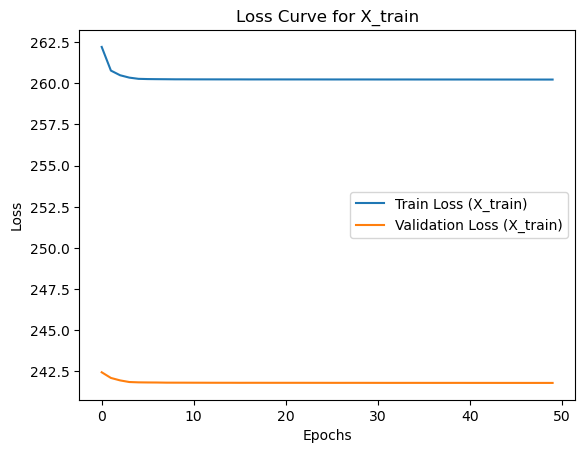

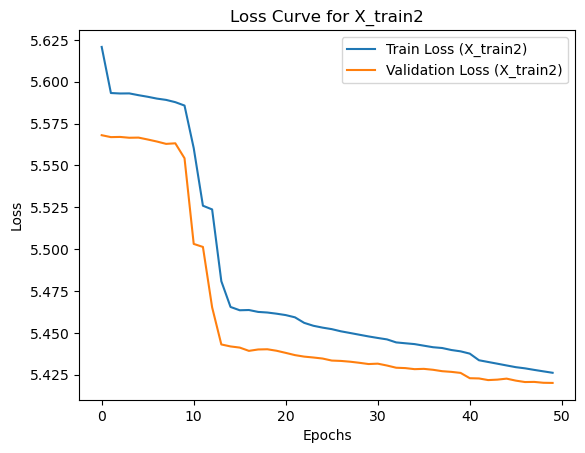

In [53]:
# 수치형 데이터로 변환 가능한 열만 선택 (X_train, X_train2 각각 처리)
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_train2_numeric = X_train2.select_dtypes(include=[np.number])

# NaN 값 처리 (있다면 0으로 대체)
X_train_numeric = X_train_numeric.fillna(0)
X_train2_numeric = X_train2_numeric.fillna(0)

# 최종적으로 NumPy 배열로 변환하고 float32로 설정
X_train_numeric = np.array(X_train_numeric, dtype=np.float32)
X_train2_numeric = np.array(X_train2_numeric, dtype=np.float32)

# X_train과 X_train2의 차원 확인
print("Shape of X_train_numeric:", X_train_numeric.shape)
print("Shape of X_train2_numeric:", X_train2_numeric.shape)

# 오토인코더 모델 수정: input_dim을 X_train_numeric에 맞게 설정
input_dim = X_train_numeric.shape[1]  # X_train_numeric의 열 수에 맞춤
encoding_dim = 512  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

# 오토인코더 네트워크 구성
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# 모델 정의 및 컴파일
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')

# X_train과 X_train2를 각각 오토인코더 모델에 맞춰 학습
print("Training on X_train_numeric dataset")
history_1 = autoencoder.fit(X_train_numeric, X_train_numeric, 
                            epochs=50, 
                            batch_size=256, 
                            shuffle=True, 
                            validation_split=0.1)

print("Training on X_train2_numeric dataset")
history_2 = autoencoder.fit(X_train2_numeric, X_train2_numeric, 
                            epochs=50, 
                            batch_size=256, 
                            shuffle=True, 
                            validation_split=0.1)

# 결과 시각화 및 성능 비교를 위해 loss 출력
import matplotlib.pyplot as plt

# 첫 번째 데이터셋 학습 결과
plt.plot(history_1.history['loss'], label='Train Loss (X_train)')
plt.plot(history_1.history['val_loss'], label='Validation Loss (X_train)')
plt.title('Loss Curve for X_train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 두 번째 데이터셋 학습 결과
plt.plot(history_2.history['loss'], label='Train Loss (X_train2)')
plt.plot(history_2.history['val_loss'], label='Validation Loss (X_train2)')
plt.title('Loss Curve for X_train2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [55]:
# 수치형 데이터로 변환 가능한 열만 선택 (X_test2 포함)
X_test_numeric = X_test.select_dtypes(include=[np.number])
X_test_numeric = X_test_numeric.fillna(0)
X_test_numeric = np.array(X_test_numeric, dtype=np.float32)

X_test2_numeric = X_test2.select_dtypes(include=[np.number])
X_test2_numeric = X_test2_numeric.fillna(0)
X_test2_numeric = np.array(X_test2_numeric, dtype=np.float32)

# X_test 데이터셋에 대해 예측
predictions = autoencoder.predict(X_test_numeric)
mse = np.mean(np.power(X_test_numeric - predictions, 2), axis=1)

# y_test는 실제 레이블 값을 기반으로 하는데, 만약 없으면 필요 시 생성해야 함
# 예를 들어, 활동의 레이블이 필요하다면 아래와 같이 수동으로 구성
y_test = X_test['activity'].values  # activity 열이 실제 레이블인 경우

# 재구성 오류 및 실제 레이블로 데이터프레임 구성
error_df = pd.DataFrame({'reconstruction_error': mse,
                         'true_class': y_test})

# true_class에 따른 재구성 오류 통계 정보 출력
error_summary = error_df.groupby('true_class').agg(['mean', 'std', 'min', 'max', 'count'])
print(error_summary)

# X_test2 데이터셋에 대해서도 동일한 방식으로 처리
predictions2 = autoencoder.predict(X_test2_numeric)
mse2 = np.mean(np.power(X_test2_numeric - predictions2, 2), axis=1)
y_test2 = X_test2['activity'].values  # activity 열이 실제 레이블인 경우

error_df2 = pd.DataFrame({'reconstruction_error': mse2,
                          'true_class': y_test2})

error_summary2 = error_df2.groupby('true_class').agg(['mean', 'std', 'min', 'max', 'count'])
print(error_summary2)


3/3 [==============================] - 0s 2ms/step
           reconstruction_error                                          
                           mean         std        min          max count
true_class                                                               
jumping              447.270569  297.605061  44.784096  1190.216553    52
standing               5.393480    0.198094   4.932435     5.810209    44
2/2 [==============================] - 0s 2ms/step
           reconstruction_error                                   
                           mean       std       min      max count
true_class                                                        
sitting                5.486065  0.445972  4.697523  7.50838    48


In [56]:
error_df.head()

,reconstruction_error,true_class
0,128.449280,jumping
1,5.534048,standing
2,5.453670,standing
3,864.540222,jumping
4,364.941650,jumping


In [57]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 10

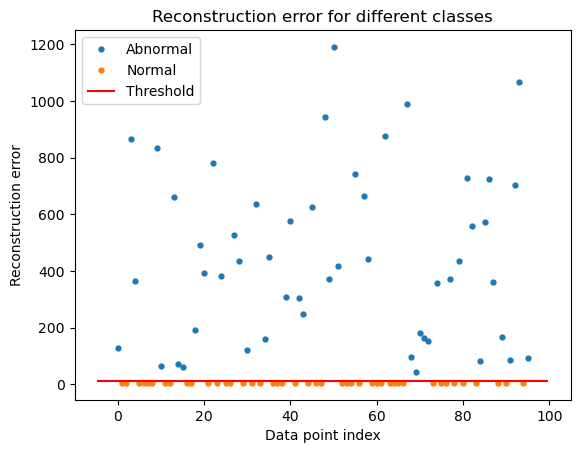

In [58]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Abnormal" if name == "jumping" else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


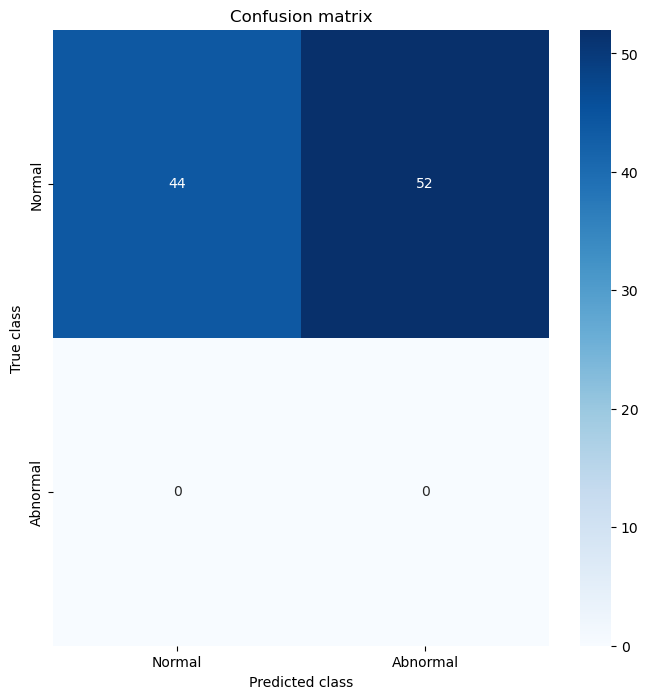

              precision    recall  f1-score   support

           0       1.00      0.46      0.63        96
           1       0.00      0.00      0.00         0

    accuracy                           0.46        96
   macro avg       0.50      0.23      0.31        96
weighted avg       1.00      0.46      0.63        96



/opt/anaconda3/envs/tabnet/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/tabnet/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/tabnet/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# threshold에 따라 y_pred 생성
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

# true_class가 문자열로 되어 있을 경우 정수형으로 변환 (sitting -> abnormal, standing/jumping -> normal)
true_class_labels = {'sitting': 1, 'standing': 0, 'jumping': 0}  # 'sitting'을 abnormal로, 나머지를 normal로 매핑
error_df['true_class'] = error_df['true_class'].map(true_class_labels)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# 분류 리포트 출력
print(classification_report(error_df.true_class, y_pred))
